In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

1.Data 

In [3]:
#Create known parameters
weight = 0.7
bias = 0.3

start = 0 
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
#Creating train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
#Create function to visualize the training set
def plot_predictions(train_data=X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions=None):
    plt.figure(figsize=(10,7))
    #Plot training data
    plt.scatter(train_data, train_labels, label="Training Data")
    #Plot test data
    plt.scatter(test_data, test_labels,c='g',s=4,label="Testing Data")
    if predictions is not None:
        #Plot the predictions
        plt.scatter(test_data, predictions,c='r',s=4,label="Predictions")
    
    plt.legend()


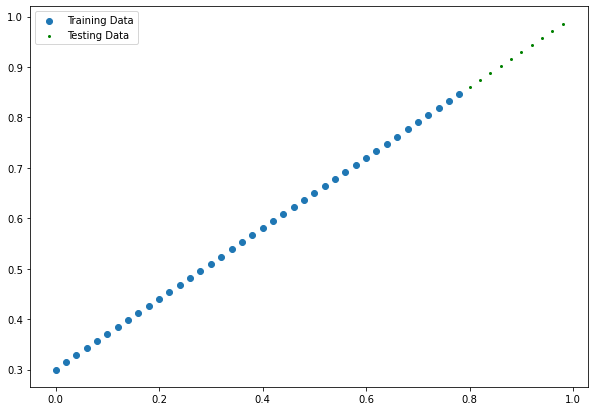

In [6]:
plot_predictions()

Build the model

In [7]:
#nn.Module are the lego blocks 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


Checking the contens of a PyTorch model

In [8]:
#Set manual seed
torch.manual_seed(3)

#Create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8033], requires_grad=True),
 Parameter containing:
 tensor([0.1748], requires_grad=True)]

In [9]:
#Get the state of the model
model_0.state_dict()

OrderedDict([('weights', tensor([0.8033])), ('bias', tensor([0.1748]))])

Making predictions using torch.inference_mode()

In [10]:
#Make predictions with the model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [11]:
y_preds

tensor([[0.8175],
        [0.8335],
        [0.8496],
        [0.8657],
        [0.8817],
        [0.8978],
        [0.9138],
        [0.9299],
        [0.9460],
        [0.9620]])

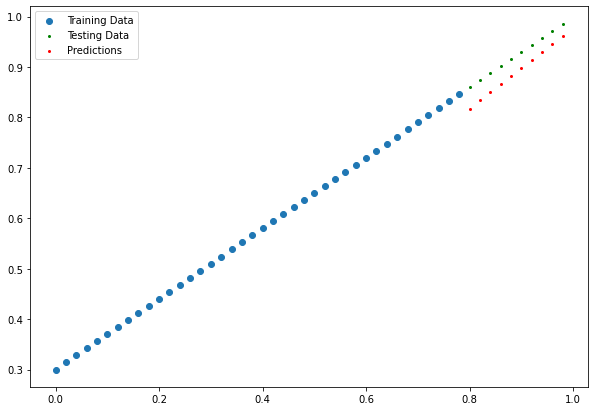

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test-y_preds

tensor([[0.0425],
        [0.0405],
        [0.0384],
        [0.0363],
        [0.0343],
        [0.0322],
        [0.0302],
        [0.0281],
        [0.0260],
        [0.0240]])

Train the model

Creating a loss function and optimizer in PyTorch

In [14]:
#Create the loss function
loss_fn = nn.L1Loss()
#Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

Creating an testing loop

In [15]:
torch.manual_seed(3)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    #Put model in training mode
    model_0.train()

    #Forward pass on the train data
    y_pred = model_0(X_train)
    
    #Calculate the loss
    loss = loss_fn(y_pred, y_train)

    #Zero grad of the optimizer
    optimizer.zero_grad()

    #Loss backwards
    loss.backward()

    #Progress the optimizer
    optimizer.step()

    #Testing
    #Put the model in evaluation mode
    model_0.eval()
    with torch.inference_mode():
        #Forward pass on test data
        test_pred = model_0(X_test)

        #Calculate loss on test data
        test_loss = loss_fn(test_pred,y_test.type(torch.float))

        if epoch % 10 ==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train loss: {loss}| MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train loss: 0.08488895744085312| MAE Test Loss: 0.01977989636361599
Epoch: 10 | MAE Train loss: 0.02520976960659027| MAE Test Loss: 0.05137182027101517
Epoch: 20 | MAE Train loss: 0.021332750096917152| MAE Test Loss: 0.049325842410326004
Epoch: 30 | MAE Train loss: 0.01790100336074829| MAE Test Loss: 0.04105328768491745
Epoch: 40 | MAE Train loss: 0.014462193474173546| MAE Test Loss: 0.032780759036540985
Epoch: 50 | MAE Train loss: 0.011030816473066807| MAE Test Loss: 0.025195086374878883
Epoch: 60 | MAE Train loss: 0.007597380317747593| MAE Test Loss: 0.016922563314437866
Epoch: 70 | MAE Train loss: 0.004158575087785721| MAE Test Loss: 0.008650029078125954
Epoch: 80 | MAE Train loss: 0.007021300494670868| MAE Test Loss: 0.002361851977184415
Epoch: 90 | MAE Train loss: 0.007021300494670868| MAE Test Loss: 0.002361851977184415


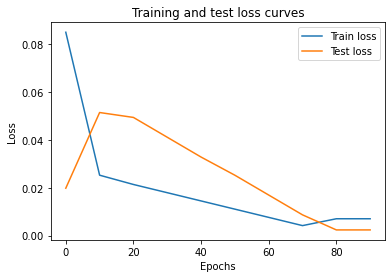

In [16]:
#Plot the loss curves
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [17]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7082])), ('bias', tensor([0.3038]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Inference

In [18]:
#Set the model in evaluation mode
model_0.eval()

#Setup the inference mode context manager
with torch.inference_mode():
    y_preds = model_0(X_test)

In [19]:
y_preds

tensor([[0.8704],
        [0.8845],
        [0.8987],
        [0.9129],
        [0.9270],
        [0.9412],
        [0.9554],
        [0.9695],
        [0.9837],
        [0.9978]])

Saving and loading a pytorch model

In [20]:
from pathlib import Path
#Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_model_0.pth


Loading a pytorch model

In [21]:
#Instantiate a new isntance of our model
loaded_model_0 = LinearRegressionModel()

#Load the state dict of our saved model  - updates with trained weights
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [22]:
#Perform inference
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

Overview of module 1

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.12.1'

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device :{device}")

Using device :cpu


In [25]:
weight = 0.7
bias = 0.3

start = 0 
end = 1
step = 0.02

X=torch.arange(start, end, step).unsqueeze(dim=1)
y= weight *X + bias
y[:10],

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),)

In [26]:
#SPlit data
train_split = int(0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test)

10

In [27]:
#Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(3)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.9915]])),
              ('linear_layer.bias', tensor([-0.7889]))]))

In [28]:
#Create loss function
loss_fn = nn.L1Loss()

#Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [29]:
torch.manual_seed(3)
epochs = 1000
for epoch in range(epochs):
    model_1.train()

    #FOrward pass
    y_pred = model_1(X_train)

    #Calculate loss
    loss = loss_fn(y_pred, y_train)

    #Zero grad optimizer
    optimizer.zero_grad()

    #LOss backward
    loss.backward()

    #Step the optimizer
    optimizer.step()

    #Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        #Calculate the loss
        test_loss = loss_fn(test_pred,y_test)

    if epoch %100 ==0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 1.7485355138778687 | Test loss: 2.580801248550415
Epoch: 100 | Train loss: 0.5964364409446716 | Test loss: 1.2337024211883545
Epoch: 200 | Train loss: 0.1976146250963211 | Test loss: 0.5116909742355347
Epoch: 300 | Train loss: 0.1601119488477707 | Test loss: 0.3744434416294098
Epoch: 400 | Train loss: 0.12574949860572815 | Test loss: 0.29309409856796265
Epoch: 500 | Train loss: 0.09140828996896744 | Test loss: 0.21311819553375244
Epoch: 600 | Train loss: 0.0570630244910717 | Test loss: 0.13245347142219543
Epoch: 700 | Train loss: 0.02272321656346321 | Test loss: 0.05247557908296585
Epoch: 800 | Train loss: 0.008689815178513527 | Test loss: 0.0005149423959665
Epoch: 900 | Train loss: 0.008689815178513527 | Test loss: 0.0005149423959665


In [30]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6915]])),
             ('linear_layer.bias', tensor([0.2946]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [31]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8478],
        [0.8616],
        [0.8755],
        [0.8893],
        [0.9031],
        [0.9170],
        [0.9308],
        [0.9446],
        [0.9584],
        [0.9723]])

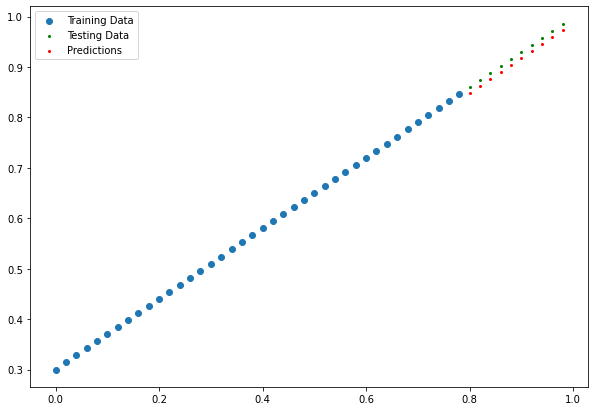

In [32]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

In [33]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_1.pth


Exercises

Create a straight line dataset using the linear regression formula (weight * X + bias).
Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.
Plot the training and testing data so it becomes visual.

In [34]:
weight = 0.3
bias=0.9

start = 0
end =1
step = 0.01
X=torch.arange(start,end,step).unsqueeze(dim=1)
y= weight *X  + bias


In [35]:
#Create train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

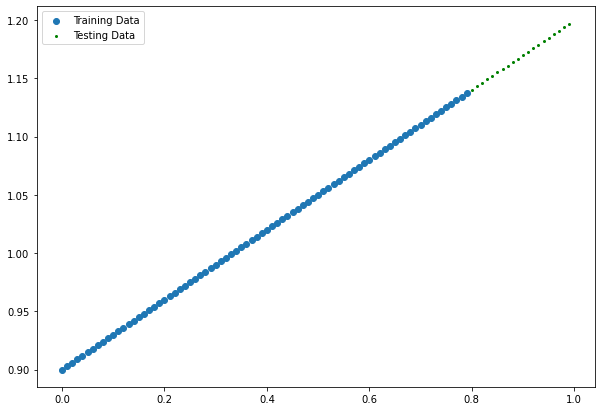

In [36]:
plot_predictions(X_train,y_train,X_test,y_test)

Extracurricular

In [45]:
from pathlib import Path
import requests

data_path = Path("data")
path = data_path/"mnist"

path.mkdir(parents=True, exist_ok=True)
url = "https://github.com/pytorch/tutorials/raw/main/_static/"
filename = "mnist.pkl.gz"

if not(path/filename).exists():
    content = requests.get(url + filename).content
    (path/filename).open("wb").write(content)


In [47]:
import pickle
import gzip

with gzip.open((path/filename).as_posix(),"rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

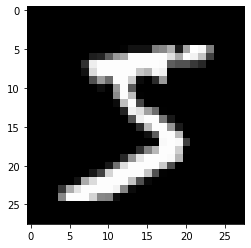

In [50]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28,28)),cmap="gray")
pyplot.show()

In [51]:
import torch
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
n,c =x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [52]:
import math
weights = torch.randn(784,10)/math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [53]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @weights + bias)

In [54]:
bs =64
xb = x_train[0:bs]
preds = model(xb)
preds[0], preds.shape
print(preds[0],preds.shape)

tensor([-2.2691, -1.9808, -2.5025, -2.2028, -2.2192, -2.3141, -2.9154, -2.1260,
        -2.6138, -2.1893], grad_fn=<SelectBackward0>) torch.Size([64, 10])
